In [2]:
# Loading all packages.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import os
import random

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras import layers, models
from keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch

C:\Users\jocke\AppData\Local\Temp\ipykernel_2696\4117279462.py:17: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [4]:
# Loading dataset
for dirname, _, filenames in os.walk('C:\\Users\\jocke\\Downloads\\slut_proj\\images\\images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\jocke\Downloads\slut_proj\images\images\train\angry\0.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\angry\1.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\angry\10.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\angry\10002.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\angry\10016.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\angry\10037.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\angry\10038.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\angry\10057.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\angry\10063.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\angry\10069.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\angry\10100.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\angry\10105.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\angry\10115.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\angry\10122.jpg
C:\Users\jocke\Do

C:\Users\jocke\Downloads\slut_proj\images\images\train\neutral\1000.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\neutral\10003.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\neutral\10014.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\neutral\10017.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\neutral\1002.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\neutral\10021.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\neutral\10024.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\neutral\10026.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\neutral\10027.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\neutral\10030.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\neutral\10036.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\neutral\10041.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\train\neutral\10045.jpg
C:\Users\jocke\Downloads\slut_proj\images\images\trai

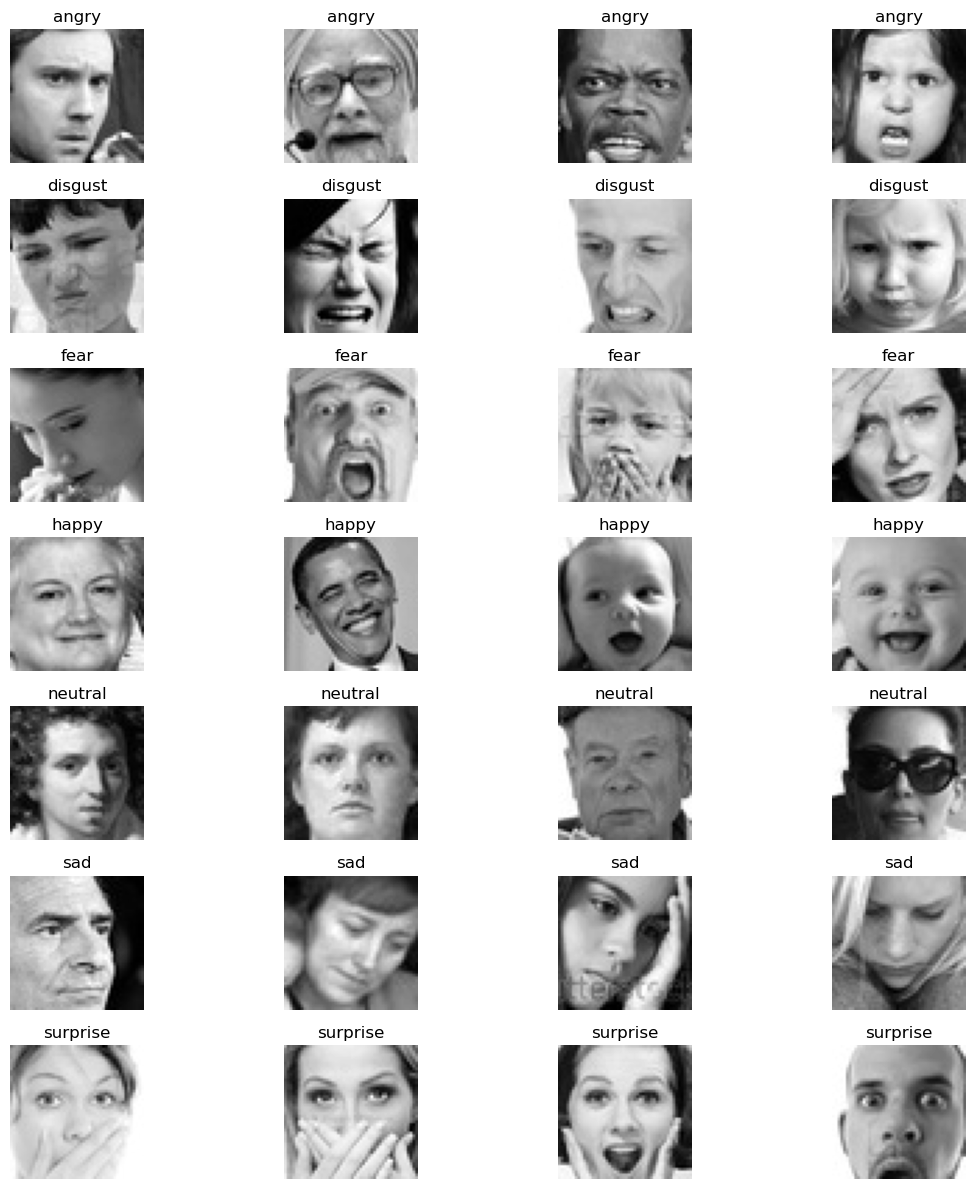

In [20]:
#Plotting
base_dir = 'C:\\Users\\jocke\\Downloads\\slut_proj\\images\\images\\train'

subfolders = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

images_to_plot = 4

fig, axes = plt.subplots(len(subfolders), images_to_plot, figsize=(12, 12))

#Loppar igenom alla sub mappar
for i, subfolder in enumerate(subfolders):
    subfolder_path = os.path.join(base_dir, subfolder)
    
    #Kollar om sub mappar finns
    if os.path.exists(subfolder_path):
        #Hämtar lista på alla filer i sub mapparna
        image_files = [f for f in os.listdir(subfolder_path) if f.endswith('.jpg') or f.endswith('.png')]
        
        selected_images = image_files[:images_to_plot]
        
        #Loppar igenom och plottar ifrån listan
        for j, image_file in enumerate(selected_images):
            img_path = os.path.join(subfolder_path, image_file)
            
            #Öppnar bilderna med PIL
            img = Image.open(img_path)
            
            #Konverterar till gråskala 'L' står för gråskala
            img = img.convert('L') 
            
            
            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].set_title(subfolder)
            axes[i, j].axis('off')
    else:
        print(f"Subfolder '{subfolder}' not found in '{base_dir}'")

#Gör plotten mera tät
plt.tight_layout()

plt.show()

In [18]:
print(f"Shape of {subfolder}/{image_file}: {img.size}")

Shape of surprise/10013.jpg: (48, 48)


In [3]:
#using dataimagegenerator
train_dir = 'C:\\Users\\jocke\\Downloads\\slut_proj\\images\\images\\train'
validation_dir = 'C:\\Users\\jocke\\Downloads\\slut_proj\\images\\images\\validation'

batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(train_dir,
                                              target_size = (48, 48),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


validation_set = datagen_val.flow_from_directory(validation_dir,
                                              target_size = (48, 48),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [4]:
#Building model
num_classes = 7
model = models.Sequential([
    layers.Conv2D(64, (3, 3), padding='same',activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), padding='same',activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), padding='same',activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    BatchNormalization(),
    layers.Dense(512, activation='relu'),
    BatchNormalization(),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True 
)

num_epochs = 50

history = model.fit(
    train_set,
    steps_per_epoch=len(train_set),
    epochs=num_epochs,
    validation_data=validation_set,
    validation_steps=len(validation_set),
    callbacks=[early_stopping]
)

Epoch 1/50
226/226 [==============================] - 201s 880ms/step - loss: 1.6140 - accuracy: 0.3900 - val_loss: 1.4662 - val_accuracy: 0.4291
Epoch 2/50
226/226 [==============================] - 218s 965ms/step - loss: 1.2387 - accuracy: 0.5285 - val_loss: 1.3540 - val_accuracy: 0.4977
Epoch 3/50
226/226 [==============================] - 228s 1s/step - loss: 1.0771 - accuracy: 0.5949 - val_loss: 1.2267 - val_accuracy: 0.5525
Epoch 4/50
226/226 [==============================] - 225s 997ms/step - loss: 0.9271 - accuracy: 0.6527 - val_loss: 1.2964 - val_accuracy: 0.5310
Epoch 5/50
226/226 [==============================] - 214s 946ms/step - loss: 0.7778 - accuracy: 0.7123 - val_loss: 1.3525 - val_accuracy: 0.5492
Epoch 6/50
226/226 [==============================] - 216s 954ms/step - loss: 0.5933 - accuracy: 0.7831 - val_loss: 1.3940 - val_accuracy: 0.5514
Epoch 7/50
226/226 [==============================] - 215s 951ms/step - loss: 0.4280 - accuracy: 0.8447 - val_loss: 1.6834 - va

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)       512       
 chNormalization)                                                
                                                      

In [43]:
model.save('my_model.h5')

C:\Users\jocke\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


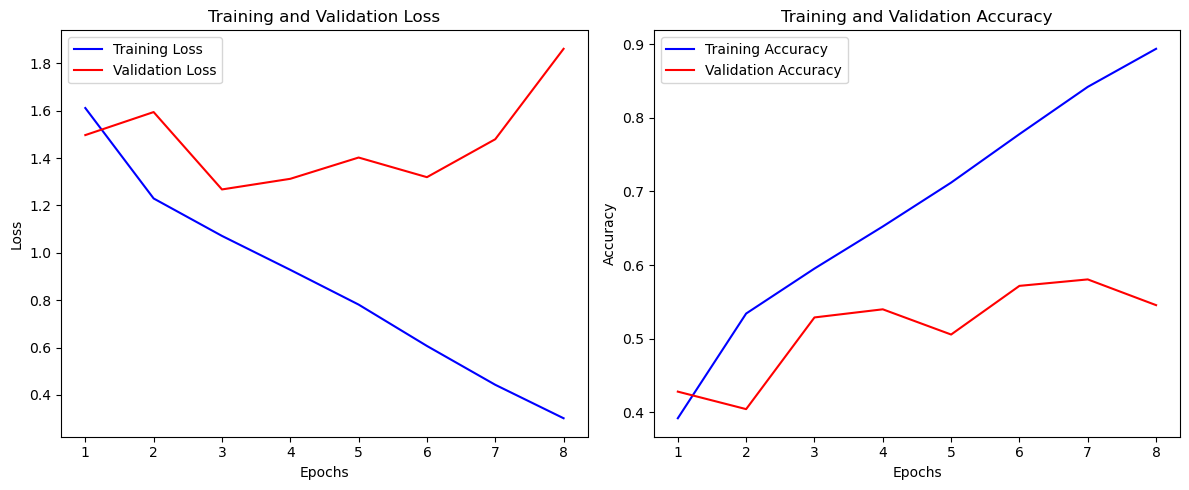

In [35]:
#Plotting results.
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Starting to load the age recognition dataset

In [2]:
#Loading 2nd dataset for age
for dirname, _, filenames in os.walk('C:\\Users\\jocke\\Downloads\\age\\20-50\\20-50'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\jocke\Downloads\age\20-50\20-50\test\20-25\20\28492.jpg
C:\Users\jocke\Downloads\age\20-50\20-50\test\20-25\20\28521.jpg
C:\Users\jocke\Downloads\age\20-50\20-50\test\20-25\20\28681.jpg
C:\Users\jocke\Downloads\age\20-50\20-50\test\20-25\20\28801.jpg
C:\Users\jocke\Downloads\age\20-50\20-50\test\20-25\20\28815.jpg
C:\Users\jocke\Downloads\age\20-50\20-50\test\20-25\20\28873.jpg
C:\Users\jocke\Downloads\age\20-50\20-50\test\20-25\20\28896.jpg
C:\Users\jocke\Downloads\age\20-50\20-50\test\20-25\20\28908.jpg
C:\Users\jocke\Downloads\age\20-50\20-50\test\20-25\20\29076.jpg
C:\Users\jocke\Downloads\age\20-50\20-50\test\20-25\20\29167.jpg
C:\Users\jocke\Downloads\age\20-50\20-50\test\20-25\20\29225.jpg
C:\Users\jocke\Downloads\age\20-50\20-50\test\20-25\20\29327.jpg
C:\Users\jocke\Downloads\age\20-50\20-50\test\20-25\20\29367.jpg
C:\Users\jocke\Downloads\age\20-50\20-50\test\20-25\20\29527.jpg
C:\Users\jocke\Downloads\age\20-50\20-50\test\20-25\20\29559.jpg
C:\Users\jocke\Downloads\

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



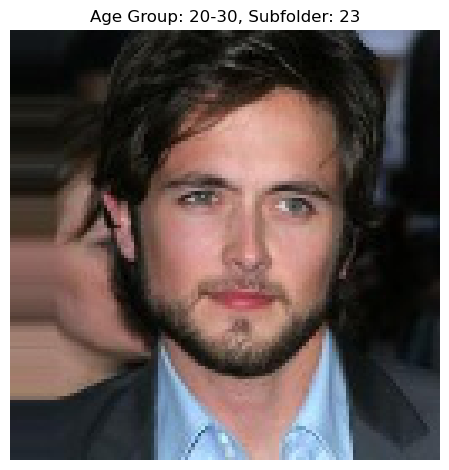

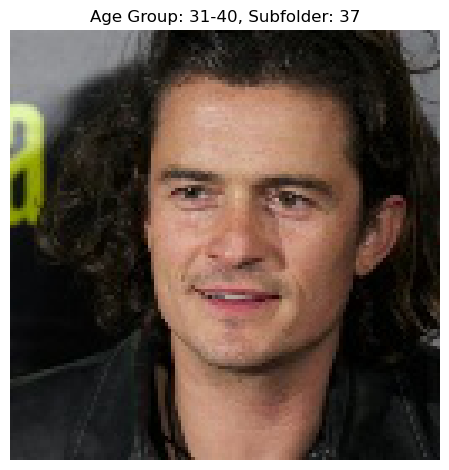

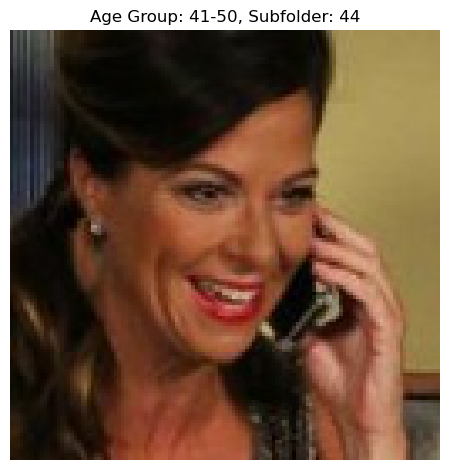

In [5]:
root_dir = "C:\\Users\\jocke\\Downloads\\age\\20-50\\20-50\\test"

age_groups = ["20-30", "31-40", "41-50"]

selected_images = []

for age_group in age_groups:
    age_group_dir = os.path.join(root_dir, age_group)

    subfolders = [f for f in os.listdir(age_group_dir) if os.path.isdir(os.path.join(age_group_dir, f))]

    if subfolders:
        selected_subfolder = random.choice(subfolders)
        subfolder_path = os.path.join(age_group_dir, selected_subfolder)

        image_files = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

        if image_files:
            selected_image = random.choice(image_files)
            image_path = os.path.join(subfolder_path, selected_image)

            selected_images.append((age_group, selected_subfolder, image_path))

for age_group, subfolder, image_path in selected_images:
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"Age Group: {age_group}, Subfolder: {subfolder}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [3]:
#Using imagedatagenerator
train_dir = 'C:\\Users\\jocke\\Downloads\\age\\20-50\\20-50\\train'
validation_dir = 'C:\\Users\\jocke\\Downloads\\age\\20-50\\20-50\\test'

batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(train_dir,
                                              target_size = (48, 48),
                                              color_mode = "rgb",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


validation_set = datagen_val.flow_from_directory(validation_dir,
                                              target_size = (48, 48),
                                              color_mode = "rgb",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 33432 images belonging to 3 classes.
Found 7008 images belonging to 3 classes.


In [3]:
#Building model, almost the same as the first one.
num_classes_2 = 3
model_2 = models.Sequential([
    layers.Conv2D(64, (3, 3), padding='same',activation='relu', input_shape=(48, 48, 3)),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), padding='same',activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), padding='same',activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    layers.Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    layers.Dense(num_classes_2, activation='softmax')
])

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True 
)

num_epochs = 50

history = model_2.fit(
    train_set,
    steps_per_epoch=len(train_set),
    epochs=num_epochs,
    validation_data=validation_set,
    validation_steps=len(validation_set),
    callbacks=[early_stopping]
)

Epoch 1/50
262/262 [==============================] - 256s 971ms/step - loss: 1.3799 - accuracy: 0.3515 - val_loss: 1.0891 - val_accuracy: 0.3876
Epoch 2/50
262/262 [==============================] - 249s 951ms/step - loss: 1.1319 - accuracy: 0.3822 - val_loss: 1.0930 - val_accuracy: 0.3834
Epoch 3/50
262/262 [==============================] - 254s 968ms/step - loss: 1.0940 - accuracy: 0.4044 - val_loss: 1.0750 - val_accuracy: 0.4214
Epoch 4/50
262/262 [==============================] - 248s 948ms/step - loss: 1.0807 - accuracy: 0.4136 - val_loss: 1.0796 - val_accuracy: 0.4110
Epoch 5/50
262/262 [==============================] - 257s 981ms/step - loss: 1.0619 - accuracy: 0.4347 - val_loss: 1.0550 - val_accuracy: 0.4348
Epoch 6/50
262/262 [==============================] - 256s 975ms/step - loss: 1.0501 - accuracy: 0.4413 - val_loss: 1.0744 - val_accuracy: 0.4202
Epoch 7/50
262/262 [==============================] - 260s 993ms/step - loss: 1.0252 - accuracy: 0.4668 - val_loss: 1.0925 -

In [4]:
model_2.save('my_age_model_1.h5')

C:\Users\jocke\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


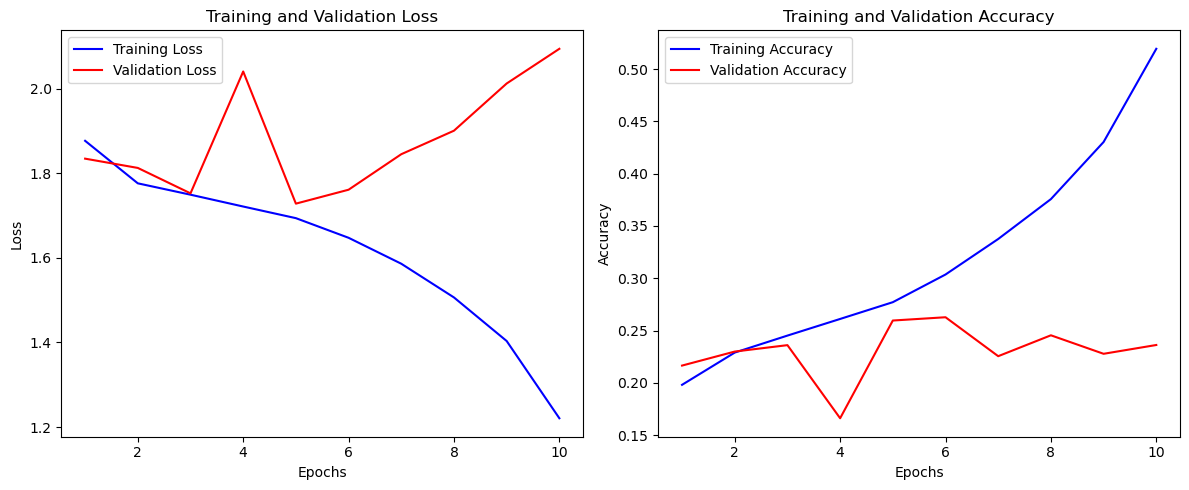

In [17]:
#Plotting results of the model.
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Trying to improve 2nd model for the age recognition with keras tuner

In [10]:
def keras_model(hp):
    num_classes_2 = 3
    model = Sequential([
        layers.Conv2D(hp.Int('conv1_units', min_value=32, max_value=256, step=32), (3, 3), padding='same', activation='relu', input_shape=(48, 48, 3)),
        BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=256, step=32), (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(hp.Int('conv3_units', min_value=32, max_value=256, step=32), (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(hp.Int('conv4_units', min_value=32, max_value=256, step=32), (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(hp.Int('dense1_units', min_value=64, max_value=512, step=64), activation='relu'),
        BatchNormalization(),
        Dropout(hp.Float('dropout1', min_value=0.2, max_value=0.7, step=0.1)),
        layers.Dense(hp.Int('dense2_units', min_value=64, max_value=512, step=64), activation='relu'),
        BatchNormalization(),
        Dropout(hp.Float('dropout2', min_value=0.2, max_value=0.7, step=0.1)),
        layers.Dense(num_classes_2, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

In [11]:
tuner = RandomSearch(
    keras_model,
    objective='val_accuracy',
    max_trials=10,
    directory='end_proj',
    project_name='end_task'
)

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True 
)

num_epochs = 50

tuner.search(train_set,
             steps_per_epoch=len(train_set),
             epochs=num_epochs,
             validation_data=validation_set,
             validation_steps=len(validation_set),
             callbacks=[early_stopping])

best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model = tuner.hypermodel.build(best_hp)

history = best_model.fit(
    train_set,
    steps_per_epoch=len(train_set),
    epochs=num_epochs,
    validation_data=validation_set,
    validation_steps=len(validation_set),
    callbacks=[early_stopping]
)

Trial 10 Complete [00h 59m 46s]
val_accuracy: 0.46175798773765564

Best val_accuracy So Far: 0.47488585114479065
Total elapsed time: 10h 13m 10s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
262/262 [==============================] - 277s 1s/step - loss: 1.4503 - accuracy: 0.3518 - val_loss: 1.0925 - val_accuracy: 0.3813
Epoch 2/50
262/262 [==============================] - 276s 1s/step - loss: 1.1374 - accuracy: 0.3717 - val_loss: 1.0758 - val_accuracy: 0.4097
Epoch 3/50
262/262 [==============================] - 278s 1s/step - loss: 1.0906 - accuracy: 0.4032 - val_loss: 1.0657 - val_accuracy: 0.4264
Epoch 4/50
262/262 [==============================] - 279s 1s/step - loss: 1.0771 - accuracy: 0.4166 - val_loss: 1.0653 - val_accuracy: 0.4261
Epoch 5/50
262/262 [==============================] - 276s 1s/step - loss: 1.0652 - accuracy: 0.4336 - val_loss: 1.0617 - val_accuracy: 0.4308
Epoch 6/50
262/262 [==============================] - 277s 1s/step - loss: 1.0540 - accuracy: 0.4400 -